# Data Analysis: GAN-Hyperparameter 

### Load modules

In [1]:
import tensorboard as tb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load experiments

In [2]:
experiment_v07 = tb.data.experimental.ExperimentFromDev("nOSG6UAvRIa3jJJ2NGd4cQ")
experiment_v08 = tb.data.experimental.ExperimentFromDev("wrI0ZoL2TWWF2EZtnXj2lA")

df_v07_ = experiment_v07.get_scalars()
df_v08_ = experiment_v08.get_scalars()

losses = ['disc_loss', 'gen_gan_loss', 'gen_l1_loss', 'gen_total_loss']

### Analysis

In [3]:
def split_df(dataframe):
    
    df = dataframe.copy()
    keys = ['version', 'alpha', 'beta', 'discrep', 'iterations', 'batchsize', 'learning_rate', 'N_telescopes', 'model_layout']
    
    versions = []
    alphas = []
    betas = []
    discreps = []
    iterationss = []
    batchsizes = []
    learning_rates = []
    N_telescopess = []
    model_layouts = []
    
    values = [versions, alphas, betas, discreps, iterationss, batchsizes, learning_rates, N_telescopess, model_layouts]
    
    
    # Loop over the whole dataset, and fill lists based on 'run' variable
    for row in df.iloc:
        for num, value in enumerate(values):
            value.append(row.run.split('_')[:][num+1])
    
    # Maybe do something with the columns in the meantime?
    
    # Loop over whole dataset again, and fill new columns
    for value, key in zip(values, keys):
        df[key] = value

    return df



In [4]:
df_v08 = split_df(df_v08_)

In [5]:
df_v08

,run,tag,step,value,version,alpha,beta,discrep,iterations,batchsize,learning_rate,N_telescopes,model_layout
0,ellipsoids_run8.10_a0.005_b0.005_discrep1_it80...,disc_loss,0,0.129950,run8.10,a0.005,b0.005,discrep1,it80k,bs1,lr2em4,teles2,addedlayer
1,ellipsoids_run8.10_a0.005_b0.005_discrep1_it80...,disc_loss,1,0.323103,run8.10,a0.005,b0.005,discrep1,it80k,bs1,lr2em4,teles2,addedlayer
2,ellipsoids_run8.10_a0.005_b0.005_discrep1_it80...,disc_loss,2,0.664702,run8.10,a0.005,b0.005,discrep1,it80k,bs1,lr2em4,teles2,addedlayer
3,ellipsoids_run8.10_a0.005_b0.005_discrep1_it80...,disc_loss,3,0.209607,run8.10,a0.005,b0.005,discrep1,it80k,bs1,lr2em4,teles2,addedlayer
4,ellipsoids_run8.10_a0.005_b0.005_discrep1_it80...,disc_loss,4,0.340881,run8.10,a0.005,b0.005,discrep1,it80k,bs1,lr2em4,teles2,addedlayer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,ellipsoids_run8.9_a0.005_b0.005_discrep1_it80k...,gen_total_loss,75,5.988400,run8.9,a0.005,b0.005,discrep1,it80k,bs1,lr2em4,teles4,addedlayer
4024,ellipsoids_run8.9_a0.005_b0.005_discrep1_it80k...,gen_total_loss,76,6.507305,run8.9,a0.005,b0.005,discrep1,it80k,bs1,lr2em4,teles4,addedlayer
4025,ellipsoids_run8.9_a0.005_b0.005_discrep1_it80k...,gen_total_loss,77,1.325849,run8.9,a0.005,b0.005,discrep1,it80k,bs1,lr2em4,teles4,addedlayer
4026,ellipsoids_run8.9_a0.005_b0.005_discrep1_it80k...,gen_total_loss,78,1.802804,run8.9,a0.005,b0.005,discrep1,it80k,bs1,lr2em4,teles4,addedlayer


### Plots

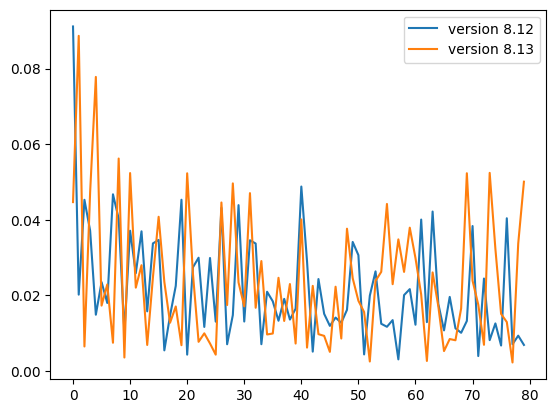

In [22]:
plt.plot(df_v08[(df_v08.version == 'run8.12') & (df_v08.tag == losses[2])].step, 
         df_v08[(df_v08.version == 'run8.12') & (df_v08.tag == losses[2])].value, 
            label= 'version 8.12')
plt.plot(df_v08[(df_v08.version == 'run8.13') & (df_v08.tag == losses[2])].step, 
         df_v08[(df_v08.version == 'run8.13') & (df_v08.tag == losses[2])].value, 
            label= 'version 8.13')
plt.legend()
plt.show()